### Implementation of logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
#read dataset
df1 = pd.read_csv('titanic_train.csv', index_col = False)

In [5]:
df1.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [4]:
#convert the column names to lowercase
df1.columns = df1.columns.str.lower()

In [6]:
#take a random sample of 20 data points.
df1_sample = df1.sample(n=30)
df1_sample = df1_sample.loc[:,['survived','pclass','sex','age','fare']]

In [9]:
groups = df1_sample.groupby('survived')
for name, group in groups:
    print(group)

     survived  pclass     sex   age     fare
682         0       3    male  20.0   9.2250
711         0       1    male   NaN  26.5500
164         0       3    male   1.0  39.6875
251         0       3  female  29.0  10.4625
667         0       3    male   NaN   7.7750
787         0       3    male   8.0  29.1250
317         0       2    male  54.0  14.0000
646         0       3    male  19.0   7.8958
850         0       3    male   4.0  31.2750
881         0       3    male  33.0   7.8958
883         0       2    male  28.0  10.5000
104         0       3    male  37.0   7.9250
144         0       2    male  18.0  11.5000
517         0       3    male   NaN  24.1500
785         0       3    male  25.0   7.2500
147         0       3  female   9.0  34.3750
287         0       3    male  22.0   7.8958
442         0       3    male  25.0   7.7750
167         0       3  female  45.0  27.9000
     survived  pclass     sex    age     fare
218         1       1  female  32.00  76.2917
84      

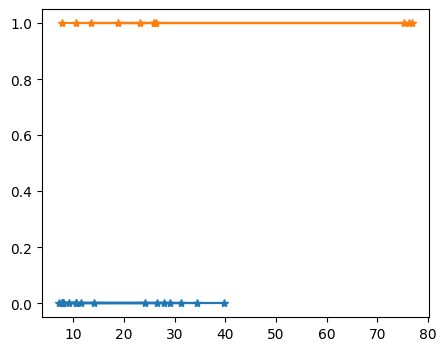

In [12]:
#Plot for the data points
fig, ax = plt.subplots(1, 1, figsize = (5,4))

groups = df1_sample.groupby('survived')
for name, group in groups:
    plt.plot(group['fare'], group['survived'], marker = '*', label = name)

plt.show()


In [33]:
#selecting relevant columns and dividing into input and target values.
xtrain = df1_sample.loc[:,['pclass','sex','age','fare']]
ytrain = df1_sample.loc[:,'survived']
#Convert Gender column from text to numeric- Male-0, female-1
xtrain['sex_encoded'] = np.where(xtrain['sex'] == "female", 1, 0)

In [35]:
#remove the text gender column
xtrain = xtrain.drop(['sex'], axis = 1)

In [36]:
xtrain.head(5)

,pclass,age,fare,sex_encoded
612,3,NaN,15.5000,1
771,3,48.0,7.8542,0
397,2,46.0,26.0000,0
815,1,NaN,0.0000,0
804,3,27.0,6.9750,0


In [ ]:
# z = np.arange(-20, 20)
# gz = 1/(1 + np.exp(-z))
# np.c_[z, gz]

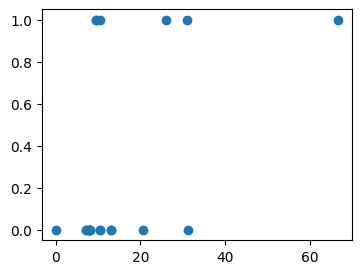

In [28]:
#Plot showing all 20 data points with respect to fare
fig, ax = plt.subplots(1,1, figsize = (4,3))
ax.scatter(df1.loc[:,'fare'], df1[:,'survived'])
plt.show()

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize = (5, 3))
# ax.plot(z, gz, c = "red")
# ax.axvline(x = 0, c = "b", ymin = min(gz), ymax = max(gz), linestyle = ":")
# plt.show()

In [17]:
x0 = np.arange(0, 6)
x1 = 3 - x0
np.c_[x0, x1]

array([[ 0,  3],
       [ 1,  2],
       [ 2,  1],
       [ 3,  0],
       [ 4, -1],
       [ 5, -2]])

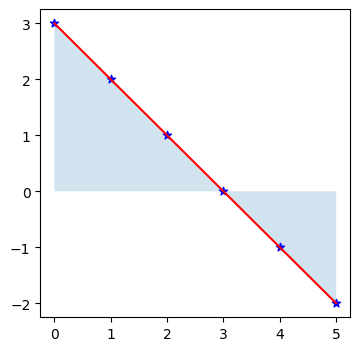

In [21]:
fig, ax = plt.subplots(1,1, figsize = (4,4))
ax.plot(x0, x1, c = "r")
ax.fill_between(x0, x1, alpha= 0.2)
ax.scatter(x0, x1, c = "blue", marker = "*")
plt.show()

In [2]:
#function to compute logistic cost
def compute_log_cost(xtrain, ytrain, w, b, reg_coeff):
    """
    Objective- Compute and return the logistic cost
    Arguments-
    xtrain (2-D matrix)- training samples
    ytrain (1-D array)- target outputs
    w (1-D array)- weights parameter
    b (scalar)- bias
    reg_coeff- regularization coefficient lambda
    """
    m, n = xtrain.shape
    cost = 0.0
    reg = 0.0
    for i in range(m):
        fx = np.dot(xtrain[i],w) + b
        gz = sigmoid(fx)
        loss = ytrain[i]*np.log(gz) + (1 - ytrain[i])*np.log(1 - gz)
        cost = cost + loss
    
    #calculating regularization term
    for j in range(n):
        reg = reg + w[j]**2
    
    reg = reg * (reg_coeff
    total_cost = (cost + reg)/(2*m)
    return total_cost


In [3]:
#function to compute gradient
def compute_gradient(xtrain, ytrain, w, b):
    m,n = xtrain.shape
    dj_dw, dj_db = [], []
    for i in range(m):
        fx = np.dot(xtrain[i], w) + b
        gz = sigmoid(fx)
        err = gz - ytrain[i]
        for j in range(n):
            dj_dw[j] = dj_dw + err*xtrain[i][j]
        dj_dw = dj_dw + err
    #average
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw, dj_db

In [ ]:
def gradient_descent(xtrain, ytrain,w, b, alpha, iters, reg_coeff, compute_cost, compute_gradient):
    w_in, b_in = w, b
    J_history, w_history, b_history = [], [] ,[]
    #regularization constant.
    reg_term = 1 - alpha*(reg_coeff/m)
    for i in range(iters):
        
        #compute gradient
        dj_dw, dj_db = compute_gradient(xtrain, ytrain, w_in, b_in)
        #simultaneous update
        w_in = w_in*reg_term - alpha*dj_dw
        b_in = b_in - dj_db
        
        #save cost and parameters history
        if i < 100000:
            J_history.append(compute_cost(xtrain, ytrain, w, b))
            w_history.append(w_in)
            b_history.append(b_in)
        
    return J_history, w_history, b_history, w_in, b_in

In [ ]:
#sigmoid function
def sigmoid(x):
    """
    Objective- compute the sigmoid value of given input
    Argument- x (scalar/1-d array)- training sample(s)
    Returns- scalar/1-d vector of sigmoid values.
    """

    gz = 1/(1 + np.exp(-x))
    
    return gz

In [ ]:
#normalize the dataset
def normalize(df):
    """
    Objective- normalize the given dataframe.
    Argument- df (1-d array)
    Return- normalized dataframe, normalizing mean and standard deviation
    """
    norm_mean = np.mean(df)
    norm_sd = np.std(df)
    norm_df = (df - norm_mean)/norm_sd
    
    return norm_mean, norm_sd, norm_df

In [ ]:
#Training datasets
#features
xtrain = np.array([])
ytrain = np.array([])

In [ ]:
#Some other initializations
alpha = 0.01
lambda_ = 0.001
w = np.zeros(xtrain.shape[1])
b = 0
iters = 100

In [ ]:
#call to gradient descnet
J_history, w_history, b_history, final_w, final_b = gradient_descent(xtrain, ytrain,w, b, 
                                                                     alpha, iters, lambda_, compute_cost, compute_gradient)

In [ ]:
#Equation for descision boundary.